# **Question 1**

## Sub-Question 2

(i) Import libraries and read data from the file.

In [ ]:
import numpy as nb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ds = pd.read_csv('/content/drive/My Drive/AIML/iris.csv')

(ii) Display the last column data.

In [ ]:
ds.tail(1)

,sepal.length,sepal.width,petal.length,petal.width,variety
149,5.9,3.0,5.1,1.8,Virginica


(iii) Check are there any missing values?

In [ ]:
ds.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

(iv) If missing values exist, replace them with the appropriate method.

In [ ]:
ds.fillna(ds.mean().round(1), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


(v) Find the correlation between the data & display heatmap.

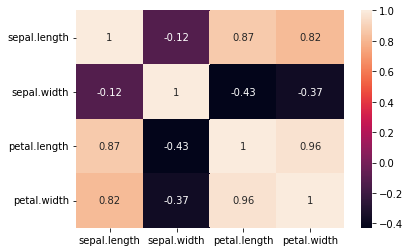

In [ ]:
sns.heatmap(ds.corr(),annot=True)

## Sub-Question 3

(i) Split the data into 80% for training and 20% for testing

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
X, y = iris.data, iris.target

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

(ii) Apply decision tree classifier with default values.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)
y_pred_dt = dt_classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_dt))

Accuracy:  0.9666666666666667


(iii) Print Classification report.

In [ ]:
from sklearn.metrics import classification_report
clr = classification_report(y_test, y_pred_dt)
clr

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      0.92      0.96        13\n           2       0.86      1.00      0.92         6\n\n    accuracy                           0.97        30\n   macro avg       0.95      0.97      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

(iv) Perform hyper parameter tuning with criterion=['gini','entropy'],max_depth=[3,5]

In [ ]:
param_grid={'criterion':['gini','entropy'],'max_depth':[3,5]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dt_classifier,param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5]},
             verbose=1)

(v) Display best estimator.

In [ ]:
print('Best estimator:',grid.best_estimator_)

Best estimator: DecisionTreeClassifier(max_depth=3)


# **Question 2**

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/AIML/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
#2
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
#3
x = dataset['Age']
y = dataset['EstimatedSalary']

In [ ]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Estimated Salary')

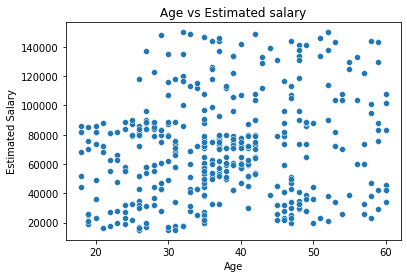

In [ ]:
#4
sns.scatterplot(x,y)
plt.title('Age vs Estimated salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

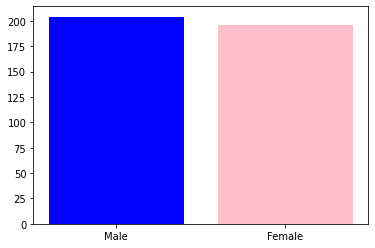

In [ ]:
#5
plt.bar(x=dataset['Gender'].unique(),height=dataset['Gender'].value_counts(),color=['Blue','Pink'])
plt.show()


In [ ]:
dataset['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [ ]:
x = dataset.iloc[:,[2,3]].values # iloc=index location, we need trained data all rows and columns so we put ':' there
y = dataset.iloc[:,-1].values # -1 means last column
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
#3.1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=1) 

In [ ]:
#3.2 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [ ]:
#3.3 and 3.4
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='liblinear',multi_class='ovr')
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

In [ ]:
#3.5
from sklearn.metrics import accuracy_score
print('Accuraccy score : ',accuracy_score(y_pred,y_test))

Accuraccy score :  0.84


# **Question 3**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset2 = pd.read_csv('/content/drive/My Drive/AIML/diamonds.csv')
dataset2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
dataset2.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
dataset2.depth.mean()

61.749404894327036

In [ ]:
dataset2.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


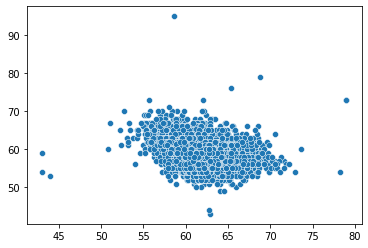

In [ ]:
x = dataset2['depth'].values
y = dataset2['table'].values
sns.scatterplot(x,y)

In [ ]:
dataset2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **Question 4**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/AIML/breast_cancer.csv')
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
df.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [ ]:
x=df.corr()

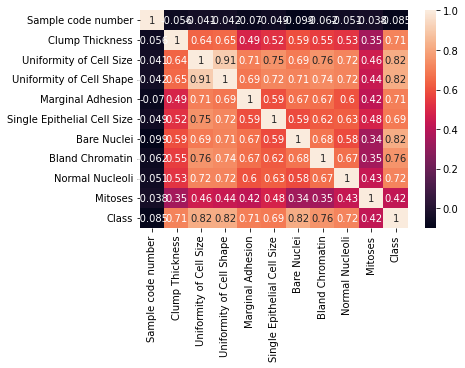

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
x,y

(array([[ 5,  1,  1, ...,  3,  1,  1],
        [ 5,  4,  4, ...,  3,  2,  1],
        [ 3,  1,  1, ...,  3,  1,  1],
        ...,
        [ 5, 10, 10, ...,  8, 10,  2],
        [ 4,  8,  6, ..., 10,  6,  1],
        [ 4,  8,  8, ..., 10,  4,  1]]),
 array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
        2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
        4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
        4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
        4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
        2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
        4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
        2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
        2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
        4, 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier()
rft.fit(X_train,y_train)
y_pred = rft.predict(X_test)

In [ ]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[50,100,150],'criterion':['gini','entropy']}
grid=GridSearchCV(rft,param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
print("best estimator: ",grid.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...criterion=gini, n_estimators=50;, score=0.990 total time=   0.1s
[CV 2/5] END ...criterion=gini, n_estimators=50;, score=0.938 total time=   0.1s
[CV 3/5] END ...criterion=gini, n_estimators=50;, score=0.958 total time=   0.1s
[CV 4/5] END ...criterion=gini, n_estimators=50;, score=0.958 total time=   0.1s
[CV 5/5] END ...criterion=gini, n_estimators=50;, score=0.979 total time=   0.1s
[CV 1/5] END ..criterion=gini, n_estimators=100;, score=0.990 total time=   0.2s
[CV 2/5] END ..criterion=gini, n_estimators=100;, score=0.938 total time=   0.2s
[CV 3/5] END ..criterion=gini, n_estimators=100;, score=0.958 total time=   0.2s
[CV 4/5] END ..criterion=gini, n_estimators=100;, score=0.979 total time=   0.2s
[CV 5/5] END ..criterion=gini, n_estimators=100;, score=0.979 total time=   0.2s
[CV 1/5] END ..criterion=gini, n_estimators=150;, score=0.990 total time=   0.3s
[CV 2/5] END ..criterion=gini, n_estimators=150;,

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator=RandomForestClassifier(criterion='entropy', n_estimators=150),X=X_train,y=y_train,cv=10)
accuracy

array([1.        , 0.97916667, 0.95833333, 0.9375    , 0.95833333,
       0.9375    , 0.91666667, 0.97916667, 0.95744681, 1.        ])

In [ ]:
accuracy.mean()*100

96.24113475177305

# **Question 5**

In [ ]:
#Q2.1
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/My Drive/AIML/CardioGoodFitness.csv")
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


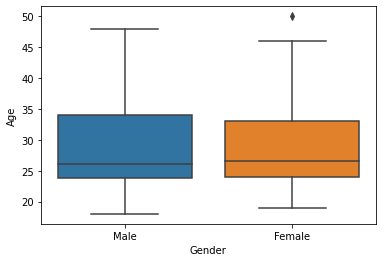

In [ ]:
#Q2.2
sns.boxplot(data['Gender'],data['Age'])
plt.show()

In [ ]:
#Q2.3
data.groupby(["Gender","Product"]).Gender.value_counts()

Gender  Product  Gender
Female  TM195    Female    40
        TM498    Female    29
        TM798    Female     7
Male    TM195    Male      40
        TM498    Male      31
        TM798    Male      33
Name: Gender, dtype: int64

In [ ]:
#Q2.4
pd.crosstab(data['Product'],data['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


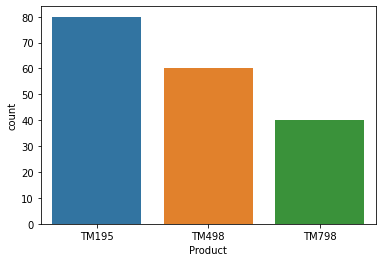

In [ ]:
#Q2.5
sns.countplot(data['Product'])

In [ ]:
#Q3.1
x=data.iloc[:, [5,6]].values
y=data.iloc[:,-1].values

In [ ]:
#Q3.2
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)


In [ ]:
#Q3.3
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score:  0.2222222222222222
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

# **Question 6**

In [ ]:
#Q2.1
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/My Drive/AIML/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#Q2.2
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.iloc[:,-2:]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


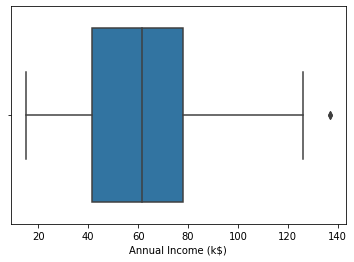

In [ ]:
sns.boxplot(df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


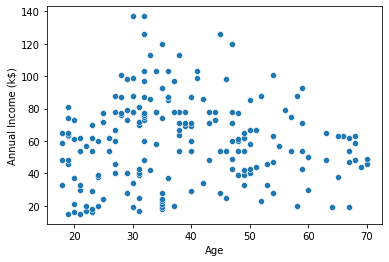

In [ ]:
#Q2.5
sns.scatterplot(df['Age'],df['Annual Income (k$)'])

In [ ]:
#Q3.1
x=df.iloc[:, [3,4]]
y=df.iloc[:, -1]

In [ ]:
df.iloc[:, [3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
df.iloc[:, -1]

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

# **Question 7**

In [ ]:
#Q2.1
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/My Drive/AIML/FuelConsumptionCo2.csv")
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
#Q2.2
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
#Q2.3
data.iloc[:, [4, 5, 8, 9, 10, 11, 12]]

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [ ]:
#Q2.4
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


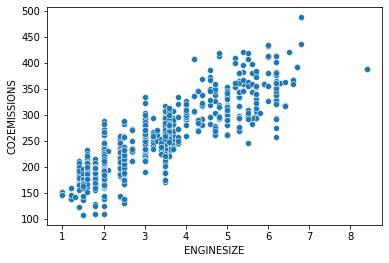

In [ ]:
#Q2.5
sns.scatterplot(data['ENGINESIZE'],data['CO2EMISSIONS'])

In [ ]:
#Q3.2
x=data.iloc[:,4:5]
y=data.iloc[:,-1]

In [ ]:
data.iloc[:,4:5]

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


In [ ]:
#Q3.1
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
#Q3.3 and 3.4
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_train_pred=reg.predict(x_train)

In [ ]:
#Q3.5
print("regression coefficient: ",reg.coef_)
print("intercept: ",reg.intercept_)

regression coefficient:  [39.4153746]
intercept:  124.77059523158408


##Prolog

In [ ]:
# Simple Cal
calc(X,Y):-
A  is X+Y,
        write('Addition is : '),write(A),nl,
B  is X-Y,
        write('Subtraction is : '),write(B),nl,
C  is X*Y,
        write('Multiplication is : '),write(C),nl,
D  is X/Y,
        write('Division is : '),write(D),nl,
E   is X**Y,
 	write('Power is : '),write(E),nl,  
F is X//Y,
        write('Integer Division is : '),write(F),nl,
G is X mod Y,
        write('Modulus is : '),write(G),nl.


In [ ]:
#brother.pl
male(rajiv).
male(sanjay).
male(rahul).
male(varun).
male(feroze).
female(sonia).
female(maneka).
female(indira).
demale(priyanka).
fatherof(rahul,rajiv).
fatherof(priyanka,rajiv).
fatherof(varun,sanjay).

brother(X,Y):-
	fatherof(X,Z),
	fatherof(Y,Z),
	male(Y).

In [ ]:
div5.pl
eval(A):-
  
	B is A mod 5,
	B==0 ->
	(write(A),write('is Divisible by 5.'));
	(write(A),write('is not Divisible by 5.')).

	 

In [ ]:
#maxlist.pl
max_list([],0).
max_list([H|T],Max):-
	max_list(T,TMax),
	H > TMax,
	Max is H.

/*max_list([H|T],Max):-
	max_list(T,TMax),
	Head=<TMax,
	Max is TMax.*/

In [ ]:
#maxmin.pl
max(X,Y):-
    (
	X=Y ->
	  write('both are equal');
	X>Y ->
	  (write('Max='),write(X));
	  (write('Max='),write(Y))
    ).



min(X,Y):-
(  
 X=Y -> 
  write('both are equal');
 X>Y -> 
  (write('Min ='),write(Y));
  (write('Min ='),write(X)) 
).

In [ ]:
#minlist.pl
min_list([],0).
min_list([H|T],Min):-
	min_list(T,TMin),
	H > TMin,
	Min is TMin.


In [ ]:
#parent.pl
girl(alia).
girl(shaheen).
girl(pooja).
boy(rahul).
boy(suresh).
father(mahesh,suresh).
father(alia,mahesh).
father(shaheen,mahesh).
father(rahul,mahesh).
father(pooja,mahesh).
mother(alia,soni).
mother(shaheen,soni).
mother(rahul,soni).
mother(pooja,tina).

sister(X,Y):-
	father(X,Z),
	father(Y,Z),
	girl(X),
	girl(Y).

parent(X,Y):-
	mother(Y,X);father(Y,X).

grandfather(X,Y):-
	father(X,Z),
	father(Z,Y),
	boy(Y).
	
	

In [ ]:
#printNum.pl
count(I,N):-
	I =< N,
	write(I),nl,
	I1 is I+1,
	count(I1,N).

In [ ]:
#sumlist.pl
sumlist([],0).
sumlist([H|T],S):-
	sumlist(T,N1),
	 S is N1+H.

In [ ]:
# Ambani
male(dhirubhai).
male(mukesh).
male(anil).
male(kothari).
male(dattaraj).
male(akash).
male(anand).
male(anant).
male(jaianmol).
male(jaianshul).
male(pruthvi).
female(kokilaben).
female(nita).
female(nina).
female(deepti).
female(tina).
female(shloka).
female(isha).

fatherof(mukesh,dhirubhai).
fatherof(nina,dhirubhai).
fatherof(deepti,dhirubhai).
fatherof(anil,dhirubhai).
fatherof(akash,mukesh).
fatherof(isha,mukesh).
fatherof(anant,mukesh).
fatherof(jaianmol,anil).
fatherof(jaianshul,anil).
fatherof(pruthvi,akash).

motherof(mukesh,kokilaben).
motherof(nina,kokilaben).
motherof(deepti,kokilaben).
motherof(anil,kokilaben).
motherof(akash,nita).
motherof(isha,nita).
motherof(anant,nita).
motherof(jaianmol,tina).
motherof(jaianshul,tina).
motherof(pruthvi,shloka).

wifeof(dhirubhai,kokilaben).
wifeof(mukesh,nita).
wifeof(anil,tina).
wifeof(kothari,nina).
wifeof(dattaraj,deepti).
wifeof(akash,shloka).
wifeof(anand,isha).

grandfather(X,Y):-
	male(Y),fatherof(X,Z),fatherof(Z,Y).


grandmother(X,Y):-
	female(Y),fatherof(X,F),fatherof(F,G),wifeof(G,M).

sister(X,Y):-
	female(Y),fatherof(X,Z),fatherof(Y,Z),X \= Y.

brother(X,Y):-
	male(Y),fatherof(X,Z),fatherof(Y,Z),X \= Y.
uncle(X,Y):-
	male(Y),fatherof(X,F),brother(F,Y).
aunty(X,Y):-
	female(Y),fatherof(X,F),brother(F,B),wifeof(B,Y).

sibling(X,Y):-
	fatherof(X,Z),fatherof(Y,Z),X \= Y.


cousin(X,Y):-
	fatherof(X,F),brother(F,B),fatherof(Y,B).